## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
#Initializing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline

In [ ]:
#Reading the salary text file in to the dataframe
salary_data = pd.read_fwf("salary.txt", header=None, 
                 names=['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'])

In [ ]:
#Dividing the given data into features and the target variable as Y i,e salary
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
X = salary_data[feature]
Y = salary_data.Salary

In [ ]:
#initializing the linear regression model
Salary_linreg = linear_model.LinearRegression()
Salary_linreg.fit(X,Y)

LinearRegression()

In [ ]:
#getting the feature and its co-efficients
print('Features and its Coefficients')
print(list(zip(feature, Salary_linreg.coef_)))

Features and its Coefficients
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]


In [ ]:
#Finding the r-squared score
print('r-squared: ', Salary_linreg.score(X,Y))

r-squared:  0.8547180674410969


In [ ]:
#lets check the correlation of the dataframe
salary_data.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


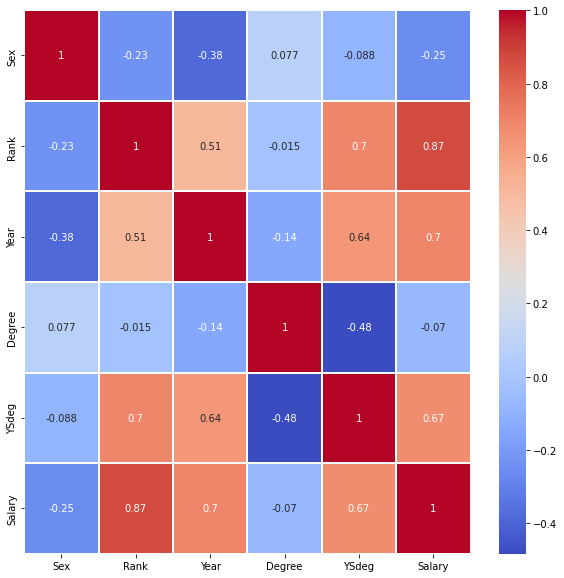

In [ ]:
#checking highly corelated data in the dataframe by using seborn library heatmap
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(salary_data.corr(),annot=True,cmap="coolwarm",linewidths=1)

By observing the heatmap sex is not corelated with the salary factor